In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import math as m
from stimator import read_model

### Direct Plot method for parameters determinarion

The Km value is 1.637


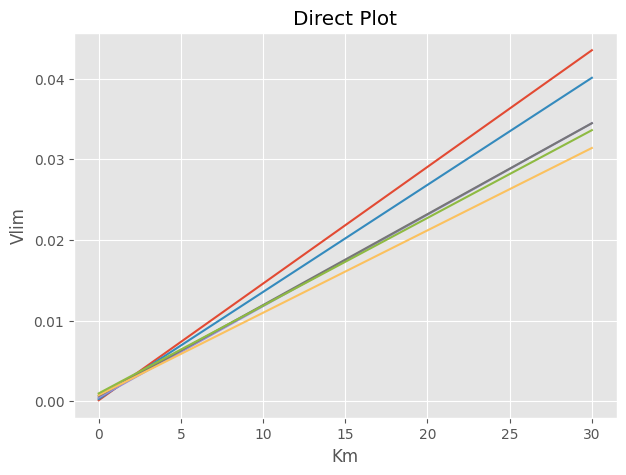

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


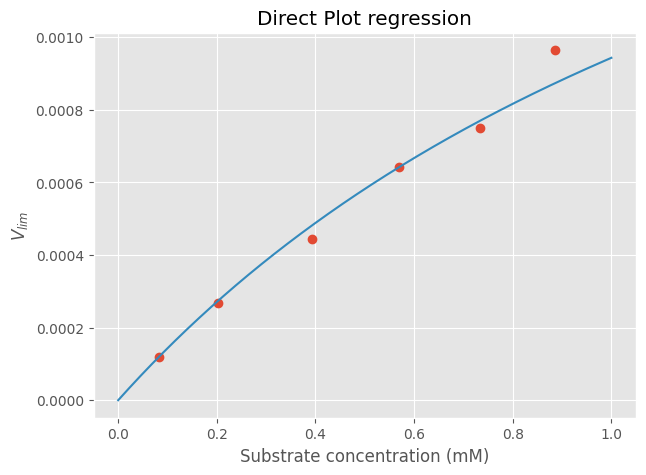

In [3]:
f = open('ignoreme.txt', 'rt')
a = []
v = []
for n in f:
    value = n.split('\t')
    #print(value)
    a.append(float(value[1].strip()))
    v.append(float(value[0].strip()))

#print(a)
K = np.linspace(0,30,1000)
Km_list = []
for num1 in list(range(0,len(a))):
    for num2 in list(range(0,len(a))):
        if num1 != num2:
            Km = (v[num2] - v[num1])/(v[num1]/a[num1]-v[num2]/a[num2])
            if Km not in Km_list:
                Km_list.append(Km)
KM_list = sorted(Km_list)
size = len(KM_list)
#print(size)
if size%2 == 0:
    Km = (KM_list[int(size/2)] + KM_list[int(size/2 +1)])/2
else:
    Km = (KM_list[int(size/2)])
print(f'The Km value is {round(Km,3)}')
#print(KM_list)

V_list = []
for i in range(len(a)):
    Vlim = Km*v[i]/a[i]+v[i]
    V_list.append(Vlim)

def find_replicate(x):
    replicates = []
    for n1 in range(len(x)):
        for n2 in range(len(x)):
            if x[n1] == x[n2] and n1 != n2:
                replicates.append(x[n1])
                return replicates

Vlim1 = find_replicate(V_list)
#vlim1 = Vlim1[0]

plt.style.use('ggplot')
plt.figure(figsize=(7,5))
for num in list(range(0,len(a))):
    V = K*(v[num]/a[num]) # Multiply elements of the array K by the equation
    V = [x + v[num] for x in V] # Sum additional term
    plt.plot(K,V)
#plt.plot(Km_list)

plt.ylabel('Vlim')
plt.xlabel('Km')
plt.grid(True, which = 'both')
#plt.ticklabel_format(style = 'sci')
plt.title('Direct Plot')
plt.show()

# Plotting original data
x = np.linspace(0,1,1000)
#Vlim1 = 0.0032
plt.figure(figsize=(7,5))
plt.plot(a,v, 'o')
plt.plot(x,x*Vlim1/(Km+x))
plt.title('Direct Plot regression')
plt.ylabel('$V_{lim}$')
plt.xlabel('Substrate concentration (mM)')
plt.grid(True)
print(plt.style.available)

### Graphs of Michaelis-Menten equation

1. The plot of v against log(a), elucidated by Michaelis and Menten themselves, allows a quick stimation on the Km and V value. Taking the derivative of v relative to log(a), it is noticible that the greates slope (represented by the maximum point on the second graph) occurs precisely when a = Km. Furthermore, v = 0.576Vlim at this point on the first graph, which allows not only an stimation of the Km value but a direct inference of the limit velocity as well. At last, this logarithimic plot allows comparison of isoenzymes whose activities and affinities for the substrate differ greatyl: in a conventional v vs. a plot, large differences in the Km value would make it imopssible for two curves to be plotted together since the graph range would be too large. In a logarithimic scale, however, such differences are still visible and more curves can be plotted together conviniently.

In [4]:
@interact(Vlim2 = (0.0,0.003,0.0001), Km2 = (0.1,4.0,0.1), Km=(0.0,10.0,0.01),Vlim=(0.0,10.0,0.01))
def plot(Vlim2, Km2,Km,Vlim):
    f, ax = plt.subplots(1,3,figsize=(21,5))
    x = np.linspace(0.1,20,10000)
    logx = [m.log10(n) for n in x]
    y = Vlim*x
    y = y/(Km+x)
    #ax[0].plot(x, 2.303*Km*Vlim*x/((Km+x)**2),label='logarithim a scale')
    ax[0].plot(logx,(x/(Km2+x)),label='Km2')
    ax[0].set_title('Logarithim a scale (relative response)')
    ax[0].set_ylabel('$v/V$ (%)')
    ax[0].set_xlabel('log(a)')
    ax[0].legend()
    ax[1].plot(logx,2.303*Km*Vlim*x/(Km+x)**2,label='Km1')
    ax[1].plot(logx,2.303*Km2*Vlim2*x/(Km2+x)**2,label='Km2')
    ax[1].set_title('dv/dln(a)')
    ax[1].set_xlabel('log(a)')
    ax[1].set_ylabel('dv/dln(a)')
    ax[1].legend()
    ax[1].set_ylim(0,0.002)
    #ax[0].set_ylim(0,0.002)
    ax[2].set_ylim(-3,2)
    ax[2].plot(logx, [m.log(n) for n in y])
    ax[2].set_title('log/log scale graph')
    
    plt.show()

interactive(children=(FloatSlider(value=0.0015, description='Vlim2', max=0.003, step=0.0001), FloatSlider(valu…

### Dixon and C. Bowden method for determining inhibition constants

- **Dixon method** plots 1/v against the inhibitior concentration range for different substrate concentrations. Specific and mixed inhibition present lines crossing at an intersection, which x values is equal -Kic (competitive inhibition constant) and y value is 1/V for specific and (1+Kic/Kiu)/V for mixed inhibition.

- **C. Bowden method** plots a/v agains the inhibitor concentration for differente values of a, which generates a similar and yet different analysis as the Dixon method. In this case, the lines will intercept if the inhibition mechanism is uncompetitive or mixed, being the x value of the interception -Kiu, the anticompetitive inhibition constant, and the y interception value Km/V for catalytic and Km(1-Kiu/Kic)/V for mixed inhibition.

Note that, when determining the type of inhibition through these plotting method, one does not know and cannot indentify the exact type of mechanism (whether it is mixed or competitive/anticompetitive), being it a useful method for determining the inhibition constants for any inhibition type. The y intersection point does provide some qualitative information: since it depends on the ratio of the inhibition constant, the "degree" of competitive or anticompetitive inhibtion, i.e., how much each constant cosntributes to the mechanism, can be sorted through this point.

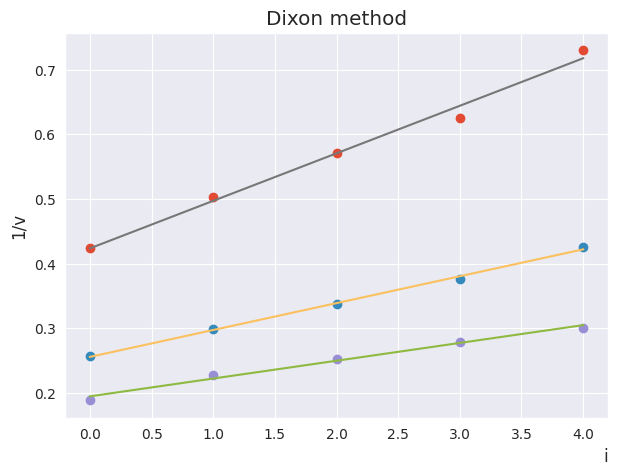

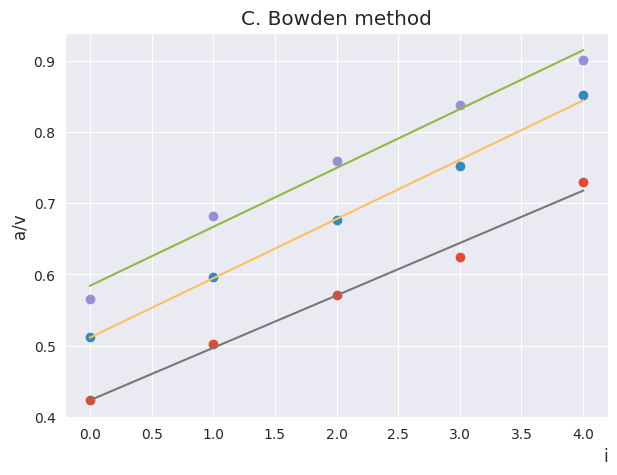

In [5]:
f = open('ignoreme2.txt')

def isastring(x):
    if type(x) == str:
        return True
    else:
        return False

i = []
v = []
for linha in f:
    if isastring(linha[0]) == True and linha[0]!='':
        value = linha.split('\t')
        #print(value)
        i.append(float(value[1].strip()))
        v.append(float(value[0].strip()))

i_final = i[0:5]
v_final = [v[i:i+5] for i in range(0,len(v),5)]
a = [1, 2, 3]
# ______________________________________________________________________________________________

# Dixon
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(1,1,figsize=(7,5))
    ax.plot(i_final,[1/n for n in v_final[0]],'o')
    ax.plot(i_final,[1/n for n in v_final[1]],'o')
    ax.plot(i_final,[1/n for n in v_final[2]],'o')
    ax.set_xlabel('i',loc='right')
    ax.set_ylabel('1/v')
    ax.set_title('Dixon method')

# Linear Regression

def mean(lists):
    mean = sum(lists)/len(lists)
    return mean

def ln_reg(x, y, coef = ['True', 'False'], Error = ['True', 'False']):
    x_m = mean(x)
    y_m = mean(y)

    numerador = sum([(x-x_m)*(y-y_m) for x, y in zip(x,y)])
    denominador = sum([(x-x_m)**2 for x in x])

    coef_ang = numerador/denominador
    coef_lin = y_m - coef_ang*x_m
    regression = [coef_ang*x+coef_lin for x in x]
    
    S = (sum([(y-(coef_ang*x+coef_lin))**2 for x,y in zip(x,y)])/(len(y)-2))**0.5
    SE_coef_ang = S/(denominador**0.5)
    SE_coef_lin = S*(1/len(y) + x_m**2/denominador)**0.5

    if coef == 'True':
        coef_ang = coef_ang
        coef_lin = coef_lin
        return regression, coef_ang, coef_lin #Answer equals tuple (regression, coef_ang, coef_lin)
    elif Error == 'True':
        coef_ang = coef_ang
        coef_lin = coef_lin
        SE_coef_ang = SE_coef_ang
        SE_coef_lin = SE_coef_lin
        print(f'The coefficientes are a = {round(coef_ang,4)} ± {round(SE_coef_ang, 4)} and b = {round(coef_lin,4)} ± {round(SE_coef_lin, 4)}')
        return regression
    else:
        return regression


y1 = ln_reg(i_final,[1/n for n in v_final[0]])
y2 = ln_reg(i_final,[1/n for n in v_final[1]])
y3 = ln_reg(i_final,[1/n for n in v_final[2]])


ax.plot(i_final,y1)
ax.plot(i_final,y2)
ax.plot(i_final,y3)

plt.show()
# ______________________________________________________________________________________________

# C. Bowden

with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(1,1,figsize=(7,5))
    ax.plot(i_final,[a[0]/n for n in v_final[0]],'o')
    ax.plot(i_final,[a[1]/n for n in v_final[1]],'o')
    ax.plot(i_final,[a[2]/n for n in v_final[2]],'o')
    ax.set_xlabel('i',loc='right')
    ax.set_ylabel('a/v')
    ax.set_title('C. Bowden method')

# Linear Regression

y1 = ln_reg(i_final,[a[0]/n for n in v_final[0]])
y2 = ln_reg(i_final,[a[1]/n for n in v_final[1]])
y3 = ln_reg(i_final,[a[2]/n for n in v_final[2]])

ax.plot(i_final,y1)
ax.plot(i_final,y2)
ax.plot(i_final,y3)
plt.show()

#print(i_final)
#print(v_final)


### Implicit plotting method

Common v vs. a plot in different type of inhibition:

- Specific inhibition: since the Km value is increased of a factor of **(1 + i/Kic)**, the asymptote for when a -> 0 (V/Km) decreases of the same factor, which is visible in the following plot. Increasing Kic causes this deviation to approximate from the unhibited value and decreasing it separates the asymptote from the unhibited one. This is an evidence of the inhibition mechanism considered: for specific inhibition, the inhibitor binds to the free enzyme and avoids it from binding to the substrate. The Kic constant is the dissociation constant for the considered inhibitor (when this mechanism applies) and a larger value of Kic is indicative of a weaker inhibitor binding, which causes the inhibition plot to approximate to the unhibited one.
- Catalytic inhibition: in this case, both V and Km are decreased by the same factor **(1 + i/Kiu)**, which causes the ratio V/Km to remain the same as the unhibited one. This means that a plot of kintic data obtained from unhibited and inhibited enzyme in which the inhibition mehcanism is catalytic, both will present the same asymptote. However, the limit rate is shortened of this same factor, which causes the horizontal asymptote to appear at lower v values.

An interesting consequence of both type os inhibition is percieved when Km values are compared: in specific inhibition, Km increases of a factor whilst in catalytic inhibition, it decreases of a different factor. In the former case, this can be interpeted as if the amounf os substrate necessary to achieve a half saturation point has increased of the presented factor and more substrate is necessary to saturate the enzyme. On the second inhibition mechanims, Km decreases, which causes the saturation point to be achieved earlier (at lower a values). However, the limit rate achieved by the enzyme is as though as it had somehow lost its catalytic capacity.

- Substrate inhibition: *when the substrate can bind to the EA complex*, it can inhibit the reaction from progressing further. In this case, the inhibition process is the same as the catalytic one in which the inhibitor is the substrate itself. When this happens, the equation depends on the **square of the substrate concentration and an inhibition constant (Kia) appears as a measure of the substrate binding to the EA complex**. This equation presents a maximum value (which can be found by taking its derivative and finding the a value at which it is equal zero) after which the enzyme acitivy decreases.

In [6]:
Km1 = 0.5
Vlim1 = 0.0017
Km2 = 3.19
Vlim2 = 0.0042
Km3 = 2.2
Vlim3 = 0.0032
n = np.linspace(0,3,100)

a = np.linspace(0,10,1000)
@interact(i=(0.0,20.0,0.1), Kiu=(0.1,10), Kic=(0.1,10), Kia=(0.01,5)) # Variar a concentração de inibidor e as constantes de inibição para cada caso
def inhibt(i, Kiu, Kic, Kia):
    
    vu = [(x*Vlim1/(1+(i/Kiu)))/((Km1/(1+(i/Kiu)))+x) for x in n] # Inibição anti-competitiva
    vc = [(x*Vlim1/((Km1*(1+i/Kic))+x)) for x in n] # Inibição competitiva
    vm = [(x*Vlim1/(1+(i/Kiu)))/(((Km1*(1+i/Kic)/(1+(i/Kiu)))+x)) for x in n] # Inibição mista
    vs = [(x*Vlim1/((Km1+x**2/Kia+x))) for x in n] # Inibição pelo substrato (dependência de a^2)
    Vmax = (Vlim1*(Km1*Kia)**0.5)/((Km1+(Km1*Kia)**0.5)+(Km1*Kia)/Kia)
    amax = (Km1*Kia)**0.5
    assintote = []
    for a in range(0,len(n)):
        assintote.append(Vlim1)

    plt.figure(figsize=(10.5,7.5))
    plt.plot(n, n*Vlim1/(Km1+n), label='uninhibited')
    plt.plot(n, vu, label ='anti-competitive')
    plt.plot(n, vc, label='competitive')
    plt.plot(n, vm, label='mixed')
    plt.plot(n, vs, label='substrate inhibition')
    plt.plot(amax, Vmax, 'o', label='Maximum', color='darkblue')
    #plt.plot(n, assintote, label = 'V_lim for tc')
    plt.ylabel('Initial rates (mM/s)')
    plt.xlabel('Substrate concentration (mM)')
    plt.legend()
    plt.style.use('seaborn-deep')
    plt.grid(True, which = 'both')
    return plt.show()

@interact(a0 = (0.1,10.0,0.1), Kmp=(0.01,5.00,0.01))
def reversible(a0, Kmp):
    plt.figure(figsize=(7,5))
    plt.title('Reversible MM kinetics')
    plt.plot(a, a*Kmp*Vlim1-Km1*Vlim2*(a0-a)/(Km1*Kmp+Kmp*a+Km1*(a0-a)), label='p1')
    plt.xlim(0,10)
    plt.ylim(0,0.10)
    
    

# O valor de V/Km (app) da inibição mista é igual ao da específica, porém o Vlim é igual ao da anti-comp.

interactive(children=(FloatSlider(value=10.0, description='i', max=20.0), FloatSlider(value=5.05, description=…

interactive(children=(FloatSlider(value=5.0, description='a0', max=10.0, min=0.1), FloatSlider(value=2.5, desc…

### Inhibition visualization through the Hanes-Woolf and Double Reciprocal plotting method

- Althouth inhibition's constants cannot be calculated from the Hanes-Woolf plot, it is still very usefull to determine the type of inhibition acting upon the system: specific inhibition, which alters the Km value (increasing it by a factor of (1+i/Kic)) but maintains the Vlim value, causes the plot equation to have the same X interception but a different slope from the unhibited plot.
- For catalytic inhibition, althou both Vlim and Km are decreased by a factor, both are decreased by **the same factor** (1 + i/Kiu), which causes the ratio Km/Vlim to be the same as the unhibited one. However, the slope value (1/Vlim) increases by this same factor since it depends only on the velocity term.
- The opposite of this changes occur in the double reciprocal plot in each inhibition type. Since the difference in both plotting method can be reduced by 'changing the x from one term to the other', the origin intersection is now 1/V and the graph slope is Km/V. Thus, in specific inhibition, the line slope changes since Km changes and in catalytic inhibition the origin interception changes due to changes in V (and, consequently, 1/V) 

In [7]:
@interact(Kic = (0.1,10.0,0.1), Kiu = (0.1,10.0,0.1), i = (0.0,10.0,0.1))
def inhibition_plot(Kic, Kiu, i):
    f, ax = plt.subplots(1,2,figsize=(14,5))
    x = np.linspace(-5,5,1000)
    x_dr = [1/x for x in x]
    un = [Km1/Vlim1 + x/Vlim1 for x in x]
    un_dr = [Km1/(Vlim1*x) + 1/Vlim1 for x in x]
    comp = [Km1*(1+i/Kic)/Vlim1 + x/Vlim1 for x in x]
    comp_dr = [Km1*(1+i/Kic)/(Vlim1*x) + 1/Vlim1 for x in x]
    uncomp = n = [Km1/Vlim1 + x/(Vlim1/(1+i/Kiu)) for x in x]
    uncomp_dr = n = [Km1/(Vlim1*x) + 1/(Vlim1/(1+i/Kiu)) for x in x]
    ax[0].plot(x,un, label='Unhibited')
    ax[0].plot(x,comp, label='Specific')
    ax[0].plot(x,uncomp, label='Catalytic')
    ax[0].legend()
    ax[0].set_ylabel('$a/v$')
    ax[0].set_xlabel('$a$')
    ax[0].set_title('Hanes-Woolf inhibition plot')
    ax[0].set_ylim(0,3000)
    ax[0].set_xlim(-2,5)
    ax[1].plot(x_dr,un_dr,label='Unhibited')
    ax[1].plot(x_dr,comp_dr,label='Specific')
    ax[1].plot(x_dr,uncomp_dr,label='Catalytic')
    ax[1].legend()
    ax[1].set_ylabel('$a/v$')
    ax[1].set_xlabel('$a$')
    ax[1].set_title('Double reciprocal plot')
    ax[1].set_ylim(0,3000)
    ax[1].set_xlim(-2,5)
    plt.show()

interactive(children=(FloatSlider(value=5.0, description='Kic', max=10.0, min=0.1), FloatSlider(value=5.0, des…

### Explicit plotting method - inhibition graphs

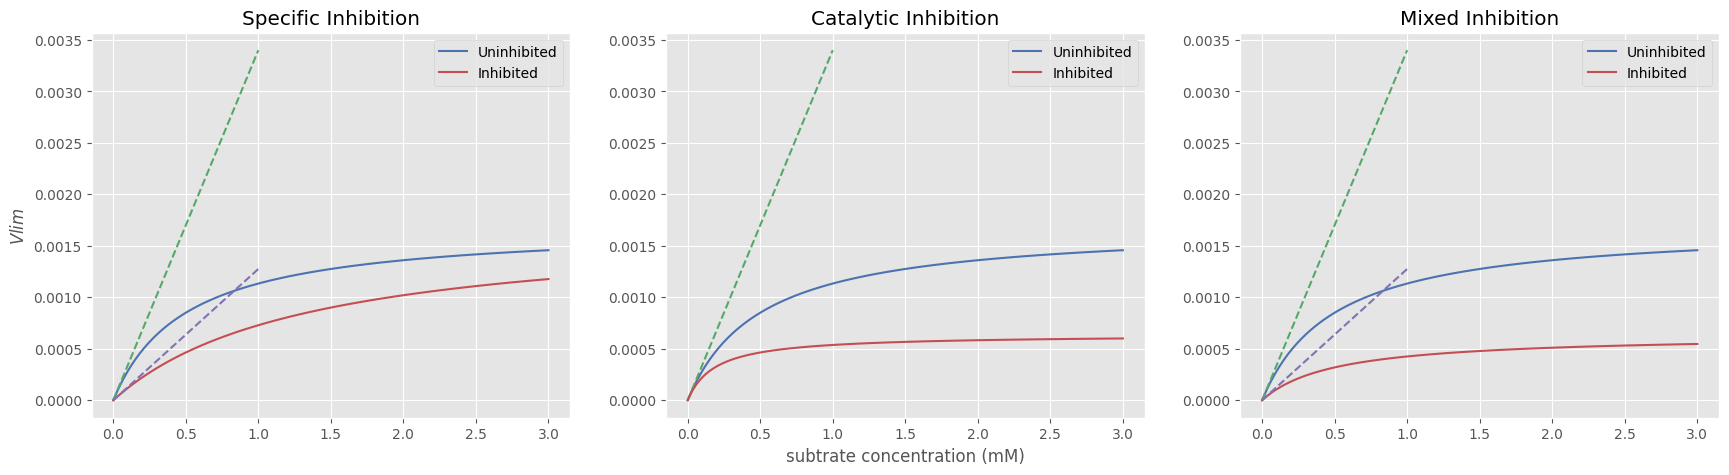

In [8]:
i=5
Kic=3
Kiu=3
n = np.linspace(0,3,100)
a = np.linspace(0,1,100)
vc = [(x*Vlim1/((Km1*(1+i/Kic))+x)) for x in n]
vu = [(x*Vlim1/(1+(i/Kiu)))/((Km1/(1+(i/Kiu)))+x) for x in n]
vm = [(x*Vlim1/(1+(i/Kiu)))/(((Km1*(1+i/Kic)/(1+(i/Kiu)))+x)) for x in n]
ass1 = Vlim1/Km1*a
ass2 = Vlim1/(Km1*(1+i/Kic))*a
fig, ax = plt.subplots(1,3,figsize=(21,5))
# a sintaxe dessa linha é relacionar o lado esquerdo (fig, ax) com o lado direito (a figura em si, seguido da primeira subfigura)
# a função plt.subplots implica algo do gênero "figura, (subplot1, subplot2, etc.)", com cada subplot em um tuple.
# os argumentos (1,2) no interior da função designam quantos subplots haverá em cada direção (1 linha com 2 duas colunas de subplot)
# cada subplot é chamado de Axes.
ax[0].plot(n, n*Vlim1/(Km1+n), label = 'Uninhibited')
ax[0].plot(a, ass1,linestyle='--')
ax[0].plot(n,vc, label = 'Inhibited')
ax[0].plot(a, ass2,linestyle='--')
ax[0].legend()
ax[0].set_title('Specific Inhibition')
ax[0].set_ylabel('$Vlim$')
ax[1].plot(n,n*Vlim1/(Km1+n), label = 'Uninhibited')
ax[1].plot(a, ass1, linestyle='--')
ax[1].plot(n,vu, label = 'Inhibited')
ax[1].set_xlabel('subtrate concentration (mM)')
ax[1].set_title('Catalytic Inhibition')
ax[1].legend()
ax[2].plot(n, n*Vlim1/(Km1+n), label = 'Uninhibited')
ax[2].plot(a, ass1,linestyle='--')
ax[2].plot(n,vm, label = 'Inhibited')
ax[2].plot(a, ass2,linestyle='--')
ax[2].legend()
ax[2].set_title('Mixed Inhibition')
#ax[1].grid(False)
#ax[2].grid(False)
plt.show()
#print(ax)

### Hill equation

The Hill equation mathematically translates the cooperative character of some proteins. Cooperation is the capacity of proteins to react to slight alterations on substrate concentration, alterations smaller than the MM equation would be able to account for any change in the enzyme acitivity. It is defined by the Hill coefficient, *h*, which is an exponent term on every term of the equation.
The sigmoidal aspect of the curve for cooperative enzymes, which is described precisely by the Hill equation, reveals important aspects of cooperativity:

- First, the steepest part of the curve is shift to more positive values of **a** and its steepness increases. This increase in steepness results in a region of the curve in which smaller variations of **a** values account for larger variations on enzyme acitivity, rendering it more sensible to substrate concentration then hyperbolic enzyme kinetics.
- Second, as a consequence of the first topic, the amount os substrate necessary to change the sigmoidal enzyme acitivity from 10% to 90% is far smaller then for hyperbolic kinetics: in the latter case, a 81 fold increase in substrate concentration is necessary for this shif in acitivity to take place, while only a (81)^1/h fold increase is necessary for cooperative enzyme. If h = 2, a 9 fold increase will achieve such shift, a far smaller difference. This is important because physiological substrate concentration are kept at very small range of values and a 81 fold increase in it would be unbearable for the cell, which means that enzymes wouldn't be able to be regulated if they all followed exclusively hyperbolic kinetics. Cooperativity, on the other hand, makes it possible for enzyme sensitivity to correspond to physiological substrate concentration ranges, which in turn allows regulation of enzyme activity in general.

It is important to note that the sigmoidal character comes from the transition from a T (tense, inactive) state to a R (relaxed, active) state. These changes occur, usually, once substrate binds to the enzyme (through homotropic allosteric regulation). At the beginning, when [S] is low, most of the enzymes are on the T state as there are few substrate present. After [S] starts rising, the transition from T to R in most of the present enzyme causes its activity to transit from an the T typical one to the R typical one. Heterotropic effector, in turn, varies the enzyme's parameters such as Km or V, increasing or decreasing its ability to bind the subtrate or catalyse the reaction.

interactive(children=(FloatSlider(value=2.5000000000000004, description='K', max=5.0, min=0.1), FloatSlider(va…

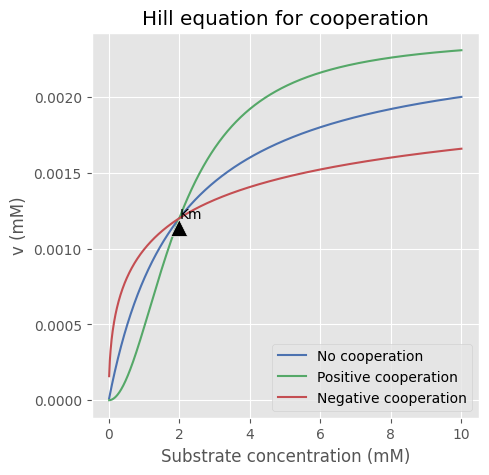

In [9]:
import math as m

@interact(K=(0.1,5.0,0.1), h=(0.1,10.0,0.1), V =(0.1,5.0,0.1))
def Hill(K, h, V):
    fig, ax = plt.subplots(1,2,figsize=(12,5))
    x = np.linspace(0.01,10,1000)
    x1 = [m.log(x1) for x1 in x]
    y = [h*x - h*m.log(K) for x in x1]
    y1 = [x - m.log(K) for x in x1]
    ax[0].plot(x, V*x**h/(K**h+x**h))
    ax[0].plot(x,V*x/(K+x))
    ax[0].set_title('Hill equation')
    ax[0].set_ylim(-0,3)
    ax[1].plot(x1,y, label='Hill plot')
    ax[1].plot(x1,y1, label='h = 1')
    ax[1].set_title('Linear logarithim plot for the Hill equation')
    ax[1].legend()
    ax[1].set_ylim(0,1.5)
    ax[1].set_xlim(0.5,3)
    return plt.show()

fig, ax = plt.subplots(1,figsize=(5,5))
x = np.linspace(0.01,10,1000)
V = 0.0024
ax.set_title('Hill equation for cooperation')
ax.plot(x,V*x/(2+x), label='No cooperation')
ax.plot(x,V*x**2/(2**2+x**2), label='Positive cooperation')
ax.plot(x,V*x**0.5/(2**0.5+x**0.5), label='Negative cooperation')
ax.set_ylabel('v (mM)')
ax.set_xlabel('Substrate concentration (mM)')
ax.annotate('Km', xy=(2, V/2),
            arrowprops=dict(facecolor='black', shrink=0.5))
ax.legend()


Bob
Charlie


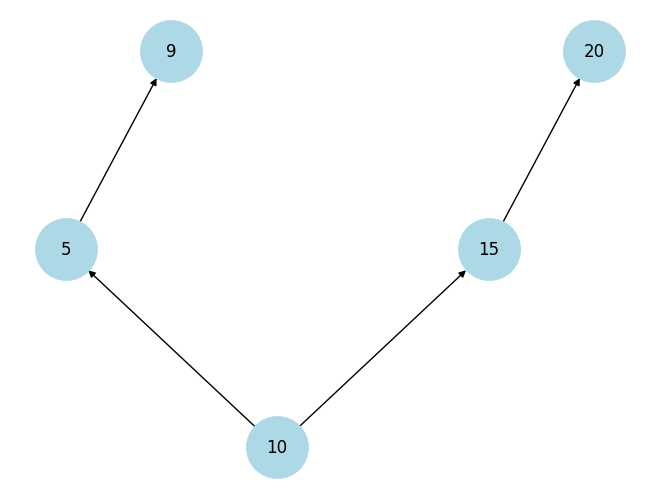

In [15]:
class TreeNode:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.left = None
        self.right = None

class BinarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, key, value):
        self.root = self._insert(self.root, key, value) # This method uses the helper method below to insert nodes in the tree
                                                        # The node used to compare is set ad the root

    def _insert(self, node, key, value):        # A helper method to add nodes in the tree
        if node is None:                        # If the previous node in none, then it just creates a new node
            return TreeNode(key, value)

        if key < node.key:                      # If the node is bigger then the entry key, the new node will be the left child of the previous one
            node.left = self._insert(node.left, key, value)
        elif key > node.key:                    # If the node is smaller then the entry key, the new node will be the right child of the previous one
            node.right = self._insert(node.right, key, value)
        # Each new node will me assigned to the left or right parameters of the previous node. 
        return node

    def search(self, key):
        return self._search(self.root, key)

    def _search(self, node, key):
        if node is None or node.key == key:
            return node.value
        elif key < node.key:
            return self._search(node.left, key)
        else:
            return self._search(node.right, key)

# Usage example
bst = BinarySearchTree()
bst.insert(10, 'Alice')
bst.insert(5, 'Bob')
bst.insert(15, 'Charlie')
bst.insert(9, 'New')
bst.insert(20, 'bigger')

print(bst.search(5))  # Output: 'Bob'
print(bst.search(15))  # Output: 'Charlie'
#print(bst.search(20))  # Output: None

import matplotlib.pyplot as plt
import networkx as nx

def visualize_tree(node, graph, pos, x=0, y=0, layer=1, width=2):
    if node is not None:
        graph.add_node(node.key, pos=(x, -y))
        if node.left:
            graph.add_edge(node.key, node.left.key)
            l_x, l_y = x - width / 2, y - 1
            pos[node.left.key] = (l_x, -l_y)
            visualize_tree(node.left, graph, pos, x=l_x, y=l_y, layer=layer+1, width=width/2)
        if node.right:
            graph.add_edge(node.key, node.right.key)
            r_x, r_y = x + width / 2, y - 1
            pos[node.right.key] = (r_x, -r_y)
            visualize_tree(node.right, graph, pos, x=r_x, y=r_y, layer=layer+1, width=width/2)

def display_tree(tree):
    graph = nx.DiGraph()
    pos = {tree.root.key: (0, 0)}
    visualize_tree(tree.root, graph, pos)
    nx.draw(graph, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=12)
    plt.show()

# Usage example
# Assuming you have a BST object 'bst' as created in the previous example
display_tree(bst)

